In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

def question1_knn_classification(filepath):
    """Handles the entire KNN classification process for the given dataset."""
    df = pd.read_excel(filepath, sheet_name='KNN Data')  # Adjust the sheet name as needed
    feature_columns = [f'embed_{i}' for i in range(384)]
    target_column = 'output'
    
    # Convert continuous output to categorical (e.g., by binning)
    df['output_binned'] = pd.cut(df[target_column], bins=3, labels=[0, 1, 2])
    X = df[feature_columns]
    y = df['output_binned']
    
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the KNN classifier
    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(X_train, y_train)
    
    # Make predictions and evaluate the model
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    metrics = {
        'train_confusion_matrix': confusion_matrix(y_train, y_train_pred),
        'test_confusion_matrix': confusion_matrix(y_test, y_test_pred),
        'train_precision': precision_score(y_train, y_train_pred, average='weighted'),
        'train_recall': recall_score(y_train, y_train_pred, average='weighted'),
        'train_f1': f1_score(y_train, y_train_pred, average='weighted'),
        'test_precision': precision_score(y_test, y_test_pred, average='weighted'),
        'test_recall': recall_score(y_test, y_test_pred, average='weighted'),
        'test_f1': f1_score(y_test, y_test_pred, average='weighted')
    }
    
    return metrics

def question2_linear_regression(filepath):
    """Handles the entire linear regression process for the given dataset."""
    df = pd.read_excel(filepath, sheet_name='Purchase data')
    df['Payment (Rs)'] = pd.to_numeric(df['Payment (Rs)'], errors='coerce')
    df = df.dropna(subset=['Payment (Rs)'])  # Remove rows where 'Payment (Rs)' is NaN
    
    X = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']]  # Replace with appropriate features
    y = df['Payment (Rs)']
    
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions and evaluate the model
    y_pred = model.predict(X_test)
    
    metrics = {
        'mse': mean_squared_error(y_test, y_pred),
        'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
        'mape': mean_absolute_percentage_error(y_test, y_pred),
        'r2': r2_score(y_test, y_pred),
        'y_pred': y_pred,
        'y_test': y_test
    }
    
    return metrics

def main():
    # File paths
    knn_file_path = "C:/Users/samre/Downloads/training_mathbert 4.xlsx"  # Adjust if necessary
    linear_reg_file_path = "C:/Users/samre/Downloads/training_mathbert 4.xlsx"  # Path for linear regression
    
    # Question 1: KNN Classification
    knn_metrics = question1_knn_classification(knn_file_path)
    
    print("Question 1: KNN Classification")
    print("Confusion Matrix (Training Data):")
    print(knn_metrics['train_confusion_matrix'])
    
    print("\nConfusion Matrix (Test Data):")
    print(knn_metrics['test_confusion_matrix'])
    
    print("\nTraining Data Metrics:")
    print(f"Precision: {knn_metrics['train_precision']:.2f}")
    print(f"Recall: {knn_metrics['train_recall']:.2f}")
    print(f"F1-Score: {knn_metrics['train_f1']:.2f}")
    
    print("\nTest Data Metrics:")
    print(f"Precision: {knn_metrics['test_precision']:.2f}")
    print(f"Recall: {knn_metrics['test_recall']:.2f}")
    print(f"F1-Score: {knn_metrics['test_f1']:.2f}")
    
    if knn_metrics['train_f1'] < 0.6 and knn_metrics['test_f1'] < 0.6:
        print("\nModel is likely underfitting.")
    elif knn_metrics['train_f1'] > 0.8 and knn_metrics['train_f1'] - knn_metrics['test_f1'] > 0.1:
        print("\nModel is likely overfitting.")
    else:
        print("\nModel is likely regular fitting.")
    
    # Question 2: Linear Regression
    linear_metrics = question2_linear_regression(linear_reg_file_path)
    
    print("\nQuestion 2: Linear Regression")
    print(f"Mean Squared Error (MSE): {linear_metrics['mse']:.4f}")
    print(f"Root Mean Squared Error (RMSE): {linear_metrics['rmse']:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {linear_metrics['mape']:.4%}")
    print(f"R-squared (R2): {linear_metrics['r2']:.4f}")
    
    results = pd.DataFrame({'Actual': linear_metrics['y_test'], 'Predicted': linear_metrics['y_pred']})
    print(results.head())

if __name__ == "__main__":
    main()


In [ ]:
def a3():
    # Generate 20 random data points for features X and Y between 1 and 10
    np.random.seed(42)  # For reproducibility
    X = np.random.uniform(1, 10, 20)
    Y = np.random.uniform(1, 10, 20)
    
    # Assign classes based on some criteria (e.g., sum of X and Y, or distance from origin)
    # For simplicity, we'll use sum of X and Y to assign classes
    classes = []
    for x, y in zip(X, Y):
        if x + y > 10:
            classes.append(1)  # Class 1 (Red)
        else:
            classes.append(0)  # Class 0 (Blue)
    # Convert the list to a NumPy array for easier indexing
    classes = np.array(classes)
    # Plot the points and color them based on their class
    plt.figure(figsize=(8, 6))
    
    # Plot Class 0 (Blue)
    plt.scatter(X[classes == 0], Y[classes == 0], color='blue', label='Class 0 (Blue)')
    
    # Plot Class 1 (Red)
    plt.scatter(X[classes == 1], Y[classes == 1], color='red', label='Class 1 (Red)')
    # Add labels and legend
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.title('Scatter Plot of Training Data')
    plt.legend()
    
    # Show the plot
    plt.grid(True)
    plt.show()

In [ ]:
def a4():
    # Generate test set data (X_test and Y_test) with values between 0 and 10 with increments of 0.1
    x_test = np.arange(0, 10.1, 0.1)
    y_test = np.arange(0, 10.1, 0.1)
    X_test, Y_test = np.meshgrid(x_test, y_test)
    X_test_flat = X_test.flatten()
    Y_test_flat = Y_test.flatten()
    # Combine X and Y into a single test set array
    test_data = np.c_[X_test_flat, Y_test_flat]
    # Use the same training data generated in a3()
    np.random.seed(42)  # Ensure consistency with a3
    X_train = np.random.uniform(1, 10, 20)
    Y_train = np.random.uniform(1, 10, 20)
    classes = np.array([1 if x + y > 10 else 0 for x, y in zip(X_train, Y_train)])
    train_data = np.c_[X_train, Y_train]

    # k-NN classifier with k=3
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(train_data, classes)

    # Predict the classes for the test data
    predicted_classes = knn.predict(test_data)

    # Plot the test data with predicted class colors
    plt.figure(figsize=(8, 6))

    # Plot predicted Class 0 (Blue)
    plt.scatter(X_test_flat[predicted_classes == 0], Y_test_flat[predicted_classes == 0], color='blue', label='Predicted Class 0 (Blue)', alpha=0.5)

    # Plot predicted Class 1 (Red)
    plt.scatter(X_test_flat[predicted_classes == 1], Y_test_flat[predicted_classes == 1], color='red', label='Predicted Class 1 (Red)', alpha=0.5)

    # Plot original training data for reference
    plt.scatter(X_train[classes == 0], Y_train[classes == 0], color='blue', edgecolor='black', label='Training Class 0', marker='o')
    plt.scatter(X_train[classes == 1], Y_train[classes == 1], color='red', edgecolor='black', label='Training Class 1', marker='o')

    # Add labels, legend, and title
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.title('Scatter Plot of Test Data Classified by k-NN (k=3)')
    plt.legend()
    
    # Show the plot
    plt.grid(True)
    plt.show()

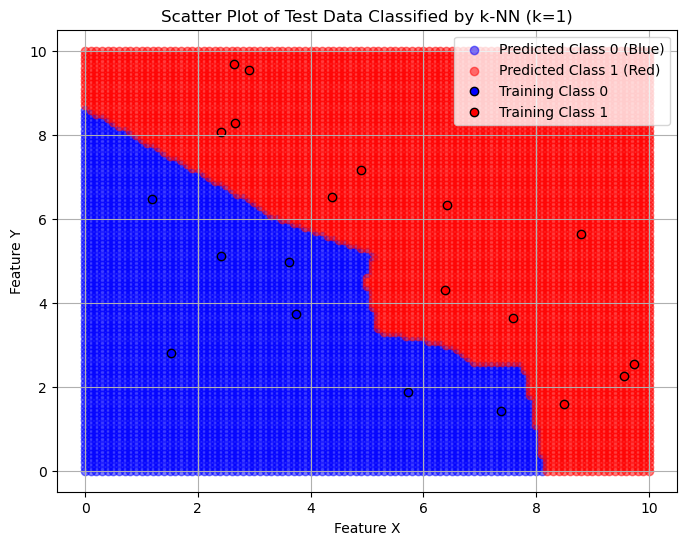

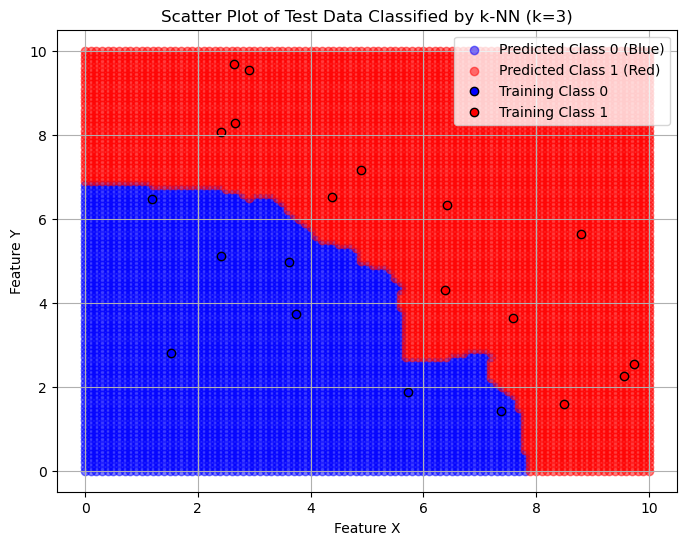

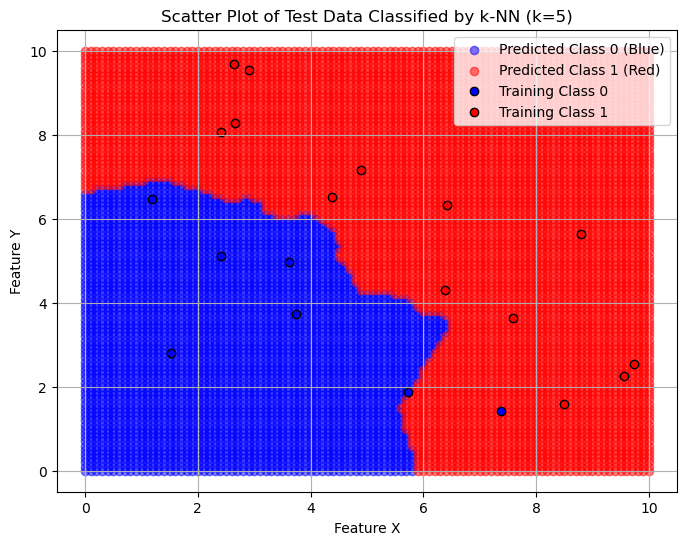

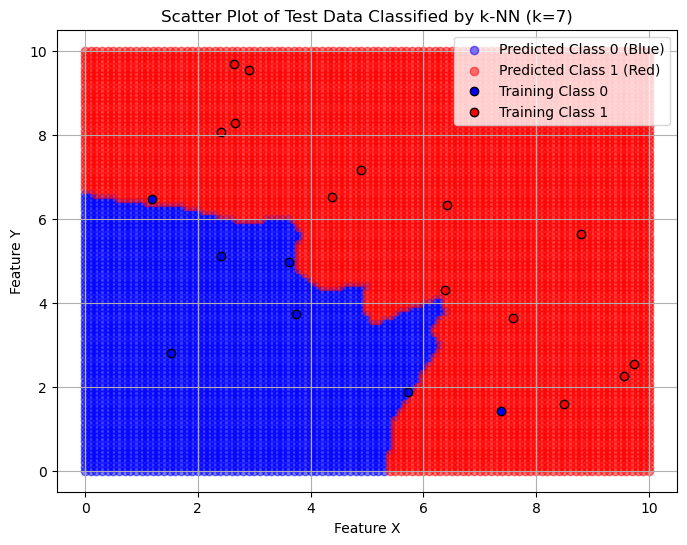

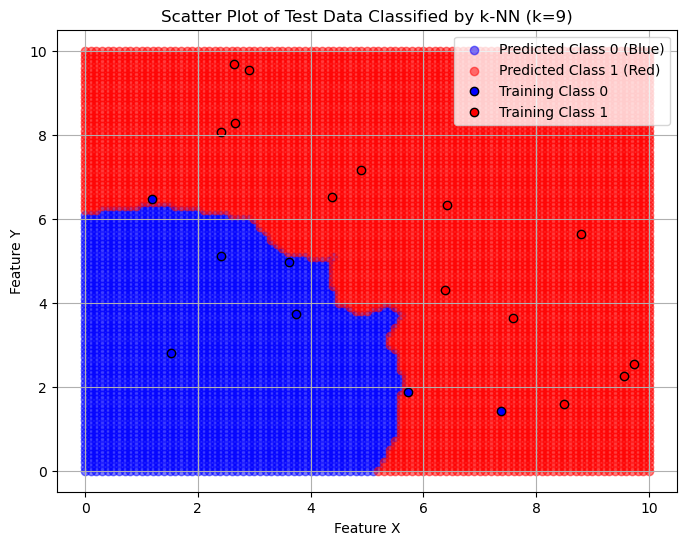

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def a4(k=3):
    # Generate test set data (X_test and Y_test) with values between 0 and 10 with increments of 0.1
    x_test = np.arange(0, 10.1, 0.1)
    y_test = np.arange(0, 10.1, 0.1)
    X_test, Y_test = np.meshgrid(x_test, y_test)
    X_test_flat = X_test.flatten()
    Y_test_flat = Y_test.flatten()
    # Combine X and Y into a single test set array
    test_data = np.c_[X_test_flat, Y_test_flat]
    
    # Use the same training data generated in a3()
    np.random.seed(42)  # Ensure consistency with a3
    X_train = np.random.uniform(1, 10, 20)
    Y_train = np.random.uniform(1, 10, 20)
    classes = np.array([1 if x + y > 10 else 0 for x, y in zip(X_train, Y_train)])
    train_data = np.c_[X_train, Y_train]

    # k-NN classifier with variable k
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data, classes)

    # Predict the classes for the test data
    predicted_classes = knn.predict(test_data)

    # Plot the test data with predicted class colors
    plt.figure(figsize=(8, 6))

    # Plot predicted Class 0 (Blue)
    plt.scatter(X_test_flat[predicted_classes == 0], Y_test_flat[predicted_classes == 0], color='blue', label='Predicted Class 0 (Blue)', alpha=0.5)

    # Plot predicted Class 1 (Red)
    plt.scatter(X_test_flat[predicted_classes == 1], Y_test_flat[predicted_classes == 1], color='red', label='Predicted Class 1 (Red)', alpha=0.5)

    # Plot original training data for reference
    plt.scatter(X_train[classes == 0], Y_train[classes == 0], color='blue', edgecolor='black', label='Training Class 0', marker='o')
    plt.scatter(X_train[classes == 1], Y_train[classes == 1], color='red', edgecolor='black', label='Training Class 1', marker='o')

    # Add labels, legend, and title
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.title(f'Scatter Plot of Test Data Classified by k-NN (k={k})')
    plt.legend()
    
    # Show the plot
    plt.grid(True)
    plt.show()

# Test with different values of k
for k in [1, 3, 5, 7, 9]:
    a4(k)


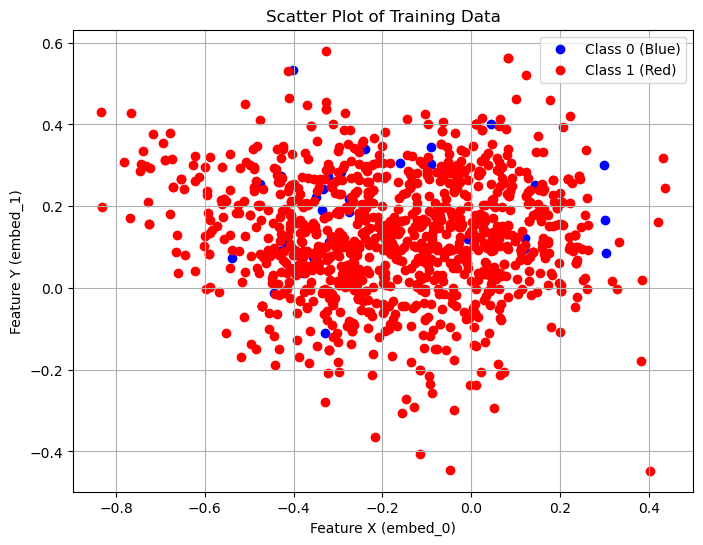

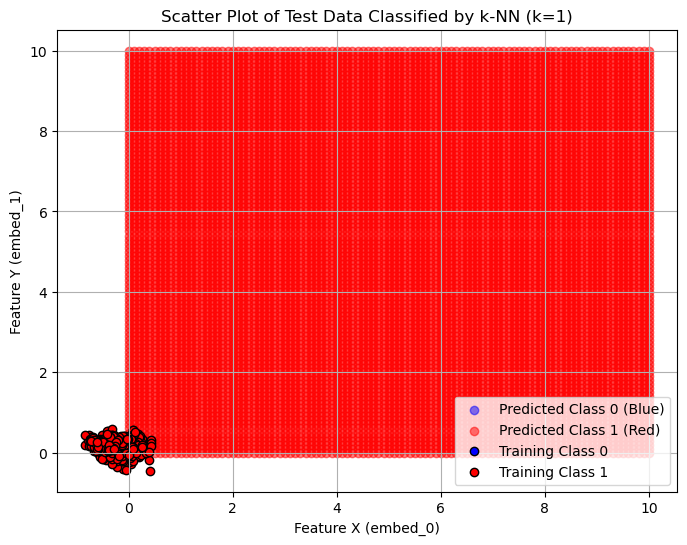

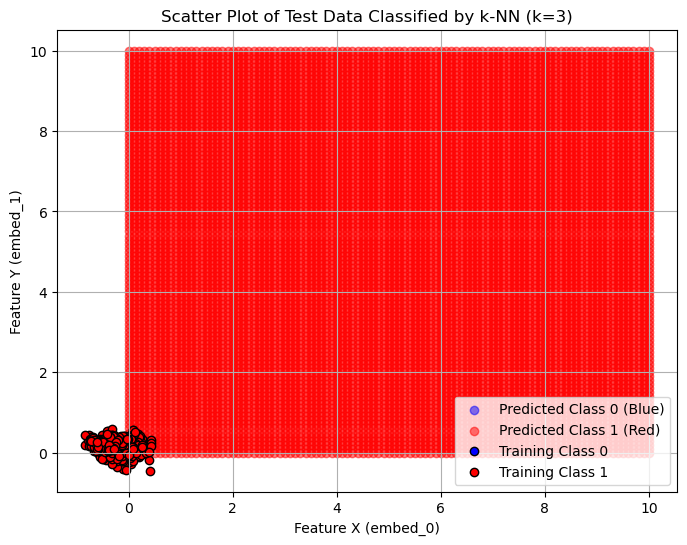

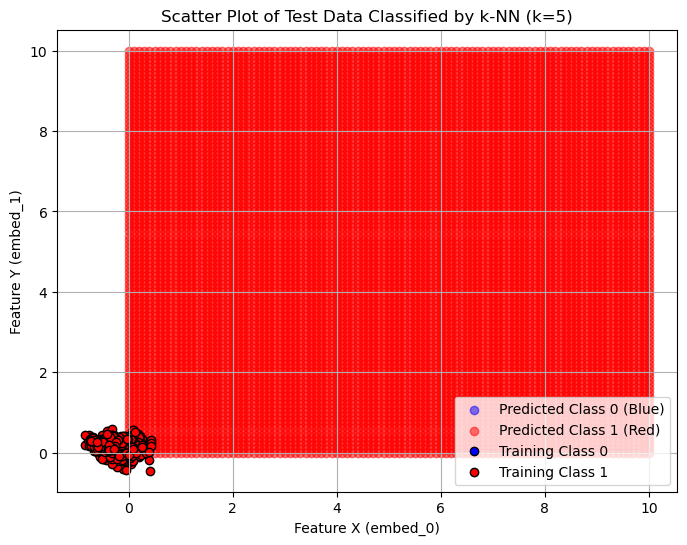

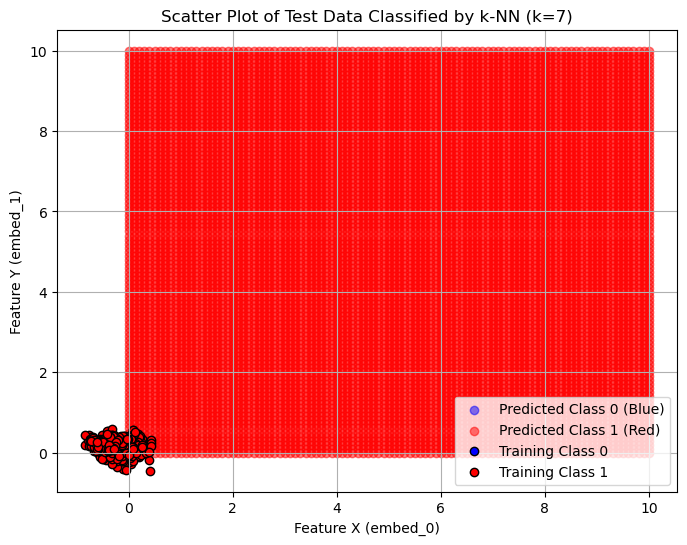

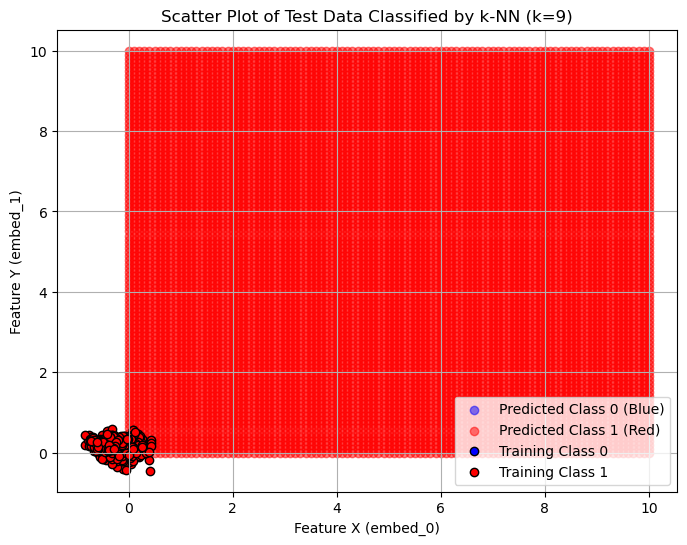

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

file_path = "C:/Users/samre/Downloads/training_mathbert 4.xlsx" 
data = pd.read_excel(file_path)

X_train = data[['embed_0', 'embed_1']].values
y_train = data['output'].values

unique_y_train = np.unique(y_train)

if len(unique_y_train) > 2:
    y_train = (y_train > 0.5).astype(int)

plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', label='Class 0 (Blue)')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', label='Class 1 (Red)')
plt.xlabel('Feature X (embed_0)')
plt.ylabel('Feature Y (embed_1)')
plt.title('Scatter Plot of Training Data')
plt.legend()
plt.grid(True)
plt.show()

x_test = np.arange(0, 10.1, 0.1)
y_test = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(x_test, y_test)
X_test_flat = X_test.flatten()
Y_test_flat = Y_test.flatten()
test_data = np.c_[X_test_flat, Y_test_flat]

for k in [1, 3, 5, 7, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    predicted_classes = knn.predict(test_data)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test_flat[predicted_classes == 0], Y_test_flat[predicted_classes == 0], color='blue', label='Predicted Class 0 (Blue)', alpha=0.5)
    plt.scatter(X_test_flat[predicted_classes == 1], Y_test_flat[predicted_classes == 1], color='red', label='Predicted Class 1 (Red)', alpha=0.5)
    plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', edgecolor='black', label='Training Class 0', marker='o')
    plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', edgecolor='black', label='Training Class 1', marker='o')
    plt.xlabel('Feature X (embed_0)')
    plt.ylabel('Feature Y (embed_1)')
    plt.title(f'Scatter Plot of Test Data Classified by k-NN (k={k})')
    plt.legend()
    plt.grid(True)
    plt.show()


Best k value: 7
Best cross-validation score: 0.9689


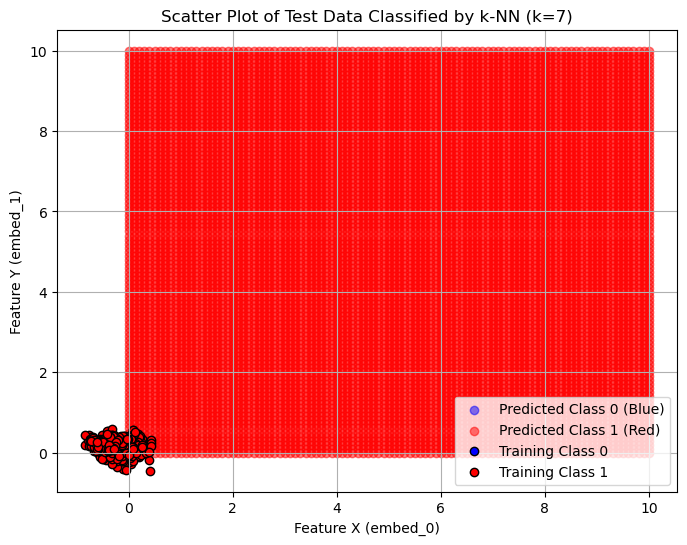

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Load the data
file_path = "C:/Users/samre/Downloads/training_mathbert 4.xlsx" 
data = pd.read_excel(file_path)

# Prepare the training data
X_train = data[['embed_0', 'embed_1']].values
y_train = data['output'].values

# Convert multi-class to binary class if needed
unique_y_train = np.unique(y_train)
if len(unique_y_train) > 2:
    y_train = (y_train > 0.5).astype(int)

# Define the parameter grid for GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 21)}

# Initialize the kNN classifier
knn = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameter and score
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

print(f"Best k value: {best_k}")
print(f"Best cross-validation score: {best_score:.4f}")

# Visualize the decision boundary for the best k value
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Generate test set data
x_test = np.arange(0, 10.1, 0.1)
y_test = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(x_test, y_test)
X_test_flat = X_test.flatten()
Y_test_flat = Y_test.flatten()
test_data = np.c_[X_test_flat, Y_test_flat]

predicted_classes = knn_best.predict(test_data)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X_test_flat[predicted_classes == 0], Y_test_flat[predicted_classes == 0], color='blue', label='Predicted Class 0 (Blue)', alpha=0.5)
plt.scatter(X_test_flat[predicted_classes == 1], Y_test_flat[predicted_classes == 1], color='red', label='Predicted Class 1 (Red)', alpha=0.5)
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', edgecolor='black', label='Training Class 0', marker='o')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', edgecolor='black', label='Training Class 1', marker='o')
plt.xlabel('Feature X (embed_0)')
plt.ylabel('Feature Y (embed_1)')
plt.title(f'Scatter Plot of Test Data Classified by k-NN (k={best_k})')
plt.legend()
plt.grid(True)
plt.show()
